<a href="https://colab.research.google.com/github/jcvdm01/machine-and-deep-learning/blob/main/Group%20Project/GroupProjectCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML group project/lending_club_loan_two.csv'
df = pd.read_csv(file_path)

df = df.drop(['grade', 'emp_length', 'emp_title', 'issue_d', 'title', 'address', 'earliest_cr_line', 'term'], axis=1)

df = df[df['application_type'].isin(['INDIVIDUAL', 'JOINT'])]
df['loan_status_binary'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
df['application_type_binary'] = df['application_type'].apply(lambda x: 1 if x == 'INDIVIDUAL' else 0)
df['initial_list_status_binary'] = df['initial_list_status'].apply(lambda x: 1 if x == 'w' else 0)
df['verification_status_binary'] = df['verification_status'].apply(lambda x: 0 if x == 'Not Verified' else 1)
df = df.drop(['loan_status', 'application_type', 'initial_list_status', 'verification_status'], axis=1)

mort_acc_median = df['mort_acc'].median()
df['mort_acc_new'] = df['mort_acc'].fillna(mort_acc_median)
df = df.drop(['mort_acc'], axis=1)

pub_rec_bankruptcies_median = df['pub_rec_bankruptcies'].median()
df['pub_rec_bankruptcies_new'] = df['pub_rec_bankruptcies'].fillna(pub_rec_bankruptcies_median)
df = df.drop(['pub_rec_bankruptcies'], axis=1)

revol_util_median = df['revol_util'].median()
df['revol_util_new'] = df['revol_util'].fillna(revol_util_median)
df = df.drop(['revol_util'], axis=1)

from pandas.api.types import CategoricalDtype


subgrade_order = ['A1', 'A2', 'A3', 'A4', 'A5',
                  'B1', 'B2', 'B3', 'B4', 'B5',
                  'C1', 'C2', 'C3', 'C4', 'C5',
                  'D1', 'D2', 'D3', 'D4', 'D5',
                  'E1', 'E2', 'E3', 'E4', 'E5',
                  'F1', 'F2', 'F3', 'F4', 'F5',
                  'G1', 'G2', 'G3', 'G4', 'G5']

cat_type = CategoricalDtype(categories=subgrade_order, ordered=True)
df['sub_grade'] = df['sub_grade'].astype(cat_type)
df['sub_grade_score'] = df['sub_grade'].cat.codes
df.drop(columns=['sub_grade'], inplace=True)

target_mean = df.groupby('purpose')['loan_status_binary'].mean()
df['purpose_target_encoded'] = df['purpose'].map(target_mean)
df.drop(columns=['purpose'], inplace=True)

df['home_ownership'] = df['home_ownership'].apply(lambda x: x if x in ['RENT', 'OWN', 'MORTGAGE'] else 'OTHER')

home_dummies = pd.get_dummies(df['home_ownership'], prefix='home', drop_first=False)
home_dummies = home_dummies.drop(columns=['home_OTHER'])

df = df.drop(columns=['home_ownership'])
df = pd.concat([df, home_dummies], axis=1)

df['home_MORTGAGE'] = df['home_MORTGAGE'].apply(lambda x: 1 if x == True else '0')
df['home_OWN'] = df['home_OWN'].apply(lambda x: 1 if x == True else '0')
df['home_RENT'] = df['home_RENT'].apply(lambda x: 1 if x == True else '0')

y = df['loan_status_binary']
X = df.drop('loan_status_binary', axis = 1)

y_train = y[:320000]
X_train = X[:320000]
y_test = y[320001:]
X_test = X[320001:]

print(df[:20][:20])

Mounted at /content/drive
    loan_amnt  int_rate  installment  annual_inc    dti  open_acc  pub_rec  \
0     10000.0     11.44       329.48    117000.0  26.24      16.0      0.0   
1      8000.0     11.99       265.68     65000.0  22.05      17.0      0.0   
2     15600.0     10.49       506.97     43057.0  12.79      13.0      0.0   
3      7200.0      6.49       220.65     54000.0   2.60       6.0      0.0   
4     24375.0     17.27       609.33     55000.0  33.95      13.0      0.0   
5     20000.0     13.33       677.07     86788.0  16.31       8.0      0.0   
6     18000.0      5.32       542.07    125000.0   1.36       8.0      0.0   
7     13000.0     11.14       426.47     46000.0  26.87      11.0      0.0   
8     18900.0     10.99       410.84    103000.0  12.52      13.0      0.0   
9     26300.0     16.29       928.40    115000.0  23.69      13.0      0.0   
10    10000.0     13.11       337.47     95000.0  12.04       5.0      1.0   
11    35000.0     14.64      1207.13  

<Axes: >

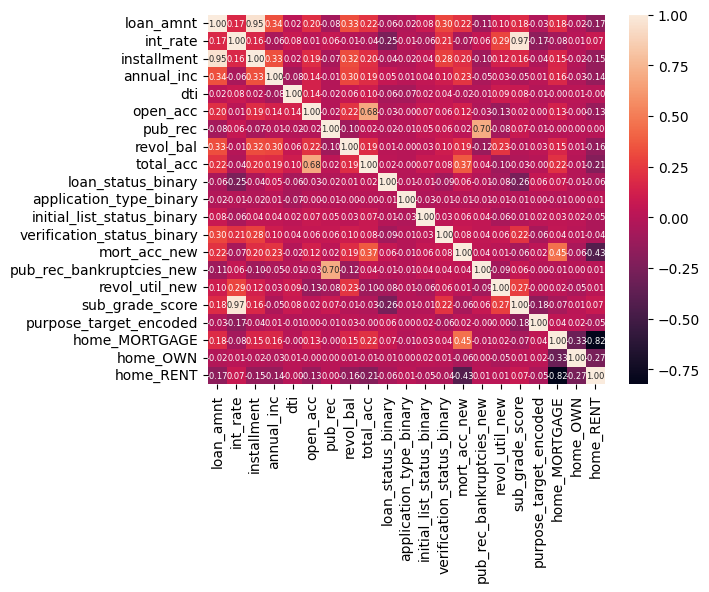

In [2]:
sns.heatmap(df.corr(), annot=True, fmt=".2f",annot_kws={"size": 6})